# Flight Price Prediction ✈️🌍

## Objective
To analyse the flight booking dataset obtained from “Ease My Trip” website and to build regression model to predict a continuous target variable. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Source of Dataset 
The data is <a href="https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction">provided by Shubham Bathwal on Kaggle</a>. Based on the dataset owner, the data was collected from the Ease my trip website using Octoparse scraping tool. Data was collected for 50 days, from February 11th to March 31st, 2022.

<img src="https://images.pexels.com/photos/47044/aircraft-landing-reach-injection-47044.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" alt="Silhouette of Airplanes" height="50">

The various features of the cleaned dataset are explained below:
<ol>
    <li>Airline: Name of the airline company. It is a categorical feature having 6 different airlines.</li>
    <li>Flight: Flight stores information regarding the plane's flight code.</li>
    <li>Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.</li>
    <li>Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.</li>
    <li>Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.</li>
    <li>Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.</li>
    <li>Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.</li>
    <li>Class: A categorical feature that contains information on seat class; either Business or Economy class.</li>
    <li>Duration: A continuous feature that displays the amount of time it takes to travel between cities in hours.</li>
    <li>Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.</li>
    <li>Price: Target variable stores information of the ticket price.</li>
</ol>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [2]:
fp = pd.read_csv("https://raw.githubusercontent.com/jadanpl/Flight-Price-Prediction/main/Clean_Flight_Price_Dataset.csv")

In [3]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
fp = fp.drop('Unnamed: 0', axis=1)
fp.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
135510,Vistara,UK-720,Kolkata,Early_Morning,one,Afternoon,Mumbai,Economy,5.42,49,6067
125719,Indigo,6E-6014,Kolkata,Morning,one,Evening,Delhi,Economy,7.67,39,4439
38160,AirAsia,I5-747,Delhi,Evening,one,Morning,Chennai,Economy,13.50,21,2974
222917,Air_India,AI-665,Delhi,Early_Morning,one,Morning,Chennai,Business,26.92,18,45257
91326,Vistara,UK-846,Bangalore,Morning,one,Afternoon,Delhi,Economy,5.58,37,4111


In [5]:
fp.describe(include=['int','object'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,42521.000000


# Univariate Analysis

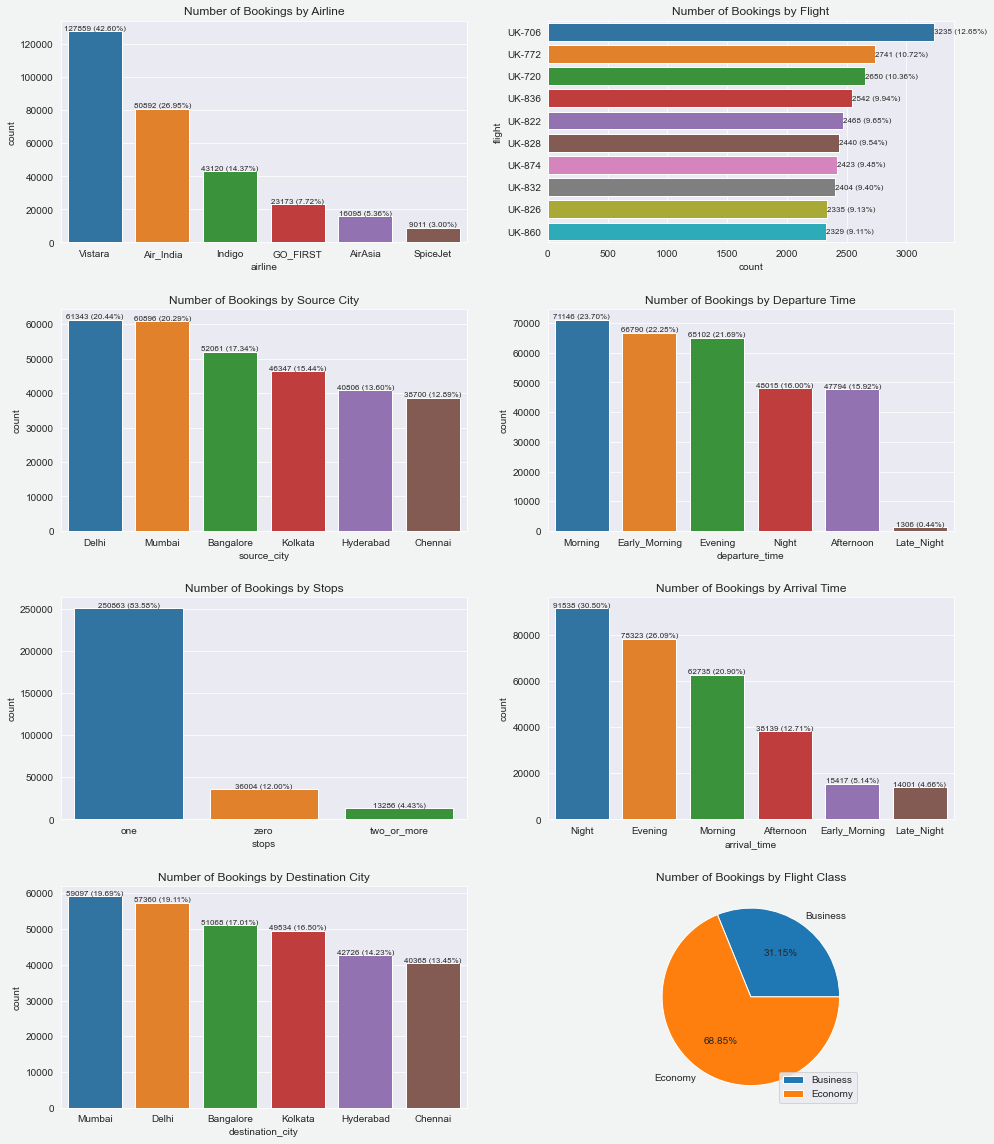

In [6]:
# for i in fp.select_dtypes(include='object').columns.to_list():
#     print (fp[i].value_counts())

fig, ax = plt.subplots(4,2, figsize=(16,20), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

abs_airline = fp['airline'].value_counts(ascending=False)
a = sns.countplot(x='airline', data=fp, order=abs_airline.index, ax=ax[0,0])
rel_airline = fp['airline'].value_counts(ascending=False, normalize=True).values*100
lbs_airline = [f"{a[0]} ({a[1]:.2f}%)" for a in zip(abs_airline,rel_airline)]
a.set_title("Number of Bookings by Airline", fontsize=12)
a.bar_label(container=a.containers[0], labels=lbs_airline, fontsize=8);

top_10_flight = fp['flight'].value_counts().reset_index().rename(columns={'index':'flight', 'flight':'count'})[0:10]
top_10_flight = fp[fp['flight'].isin(np.array(top_10_flight['flight']))]
abs_flight = top_10_flight['flight'].value_counts(ascending=False)
f = sns.countplot(y='flight', data=top_10_flight, order=abs_flight.index, ax=ax[0,1])
rel_flight = top_10_flight['flight'].value_counts(ascending=False, normalize=True).values*100
lbs_flight = [f"{f[0]} ({f[1]:.2f}%)" for f in zip(abs_flight,rel_flight)]
f.set_title("Number of Bookings by Flight", fontsize=12)
f.bar_label(container=f.containers[0], labels=lbs_flight, fontsize=8);

abs_source_city = fp['source_city'].value_counts(ascending=False)
s = sns.countplot(x='source_city', data=fp, order=abs_source_city.index, ax=ax[1,0])
rel_source_city = fp['source_city'].value_counts(ascending=False, normalize=True).values*100
lbs_source_city = [f"{s[0]} ({s[1]:.2f}%)" for s in zip(abs_source_city,rel_source_city)]
s.set_title("Number of Bookings by Source City", fontsize=12)
s.bar_label(container=s.containers[0], labels=lbs_source_city, fontsize=8);

abs_departure_time = fp['departure_time'].value_counts(ascending=False)
d = sns.countplot(x='departure_time', data=fp, order=abs_departure_time.index, ax=ax[1,1])
rel_departure_time = fp['departure_time'].value_counts(ascending=False, normalize=True).values*100
lbs_departure_time = [f"{d[0]} ({d[1]:.2f}%)" for d in zip(abs_departure_time, rel_departure_time)]
d.set_title("Number of Bookings by Departure Time", fontsize=12)
d.bar_label(container=d.containers[0], labels=lbs_departure_time, fontsize=8);
 
abs_stops = fp['stops'].value_counts(ascending=False)
t = sns.countplot(x='stops', data=fp, order=abs_stops.index, ax=ax[2,0])
rel_stops = fp['stops'].value_counts(ascending=False, normalize=True).values*100
lbs_stops = [f"{t[0]} ({t[1]:.2f}%)" for t in zip(abs_stops,rel_stops)]
t.set_title("Number of Bookings by Stops", fontsize=12)
t.bar_label(container=t.containers[0], labels=lbs_stops, fontsize=8);
 
abs_arrival_time = fp['arrival_time'].value_counts(ascending=False)
r = sns.countplot(x='arrival_time', data=fp, order=abs_arrival_time.index, ax=ax[2,1])
rel_arrival_time = fp['arrival_time'].value_counts(ascending=False, normalize=True).values*100
lbs_arrival_time = [f"{r[0]} ({r[1]:.2f}%)" for r in zip(abs_arrival_time,rel_arrival_time)]
r.set_title("Number of Bookings by Arrival Time", fontsize=12)
r.bar_label(container=r.containers[0], labels=lbs_arrival_time, fontsize=8);

abs_destination_city = fp['destination_city'].value_counts(ascending=False)
e = sns.countplot(x='destination_city', data=fp, order=abs_destination_city.index, ax=ax[3,0])
rel_destination_city = fp['destination_city'].value_counts(ascending=False, normalize=True).values*100
lbs_destination_city = [f"{e[0]} ({e[1]:.2f}%)" for e in zip(abs_destination_city,rel_destination_city)]
e.set_title("Number of Bookings by Destination City", fontsize=12)
e.bar_label(container=e.containers[0], labels=lbs_destination_city, fontsize=8);

class_cat = fp.groupby('class').agg({'class':'count'}).rename(columns={'class':'count'})
class_cat.plot.pie(y='count', autopct='%1.2f%%',ylabel="", ax=ax[3,1])
plt.title('Number of Bookings by Flight Class', fontsize=12)
plt.legend(loc='lower right');
# abs_class = fp['class'].value_counts(ascending=False)
# l = sns.countplot(x='class', data=fp, order=abs_class.index, ax=ax[3,1])
# rel_class = fp['class'].value_counts(ascending=False, normalize=True).values*100
# lbs_class = [f"{l[0]} ({l[1]:.2f}%)" for l in zip(abs_class,rel_class)]
# l.set_title("Number of Bookings by Flight Class", fontsize=12)
# l.bar_label(container=l.containers[0], labels=lbs_class, fontsize=8);

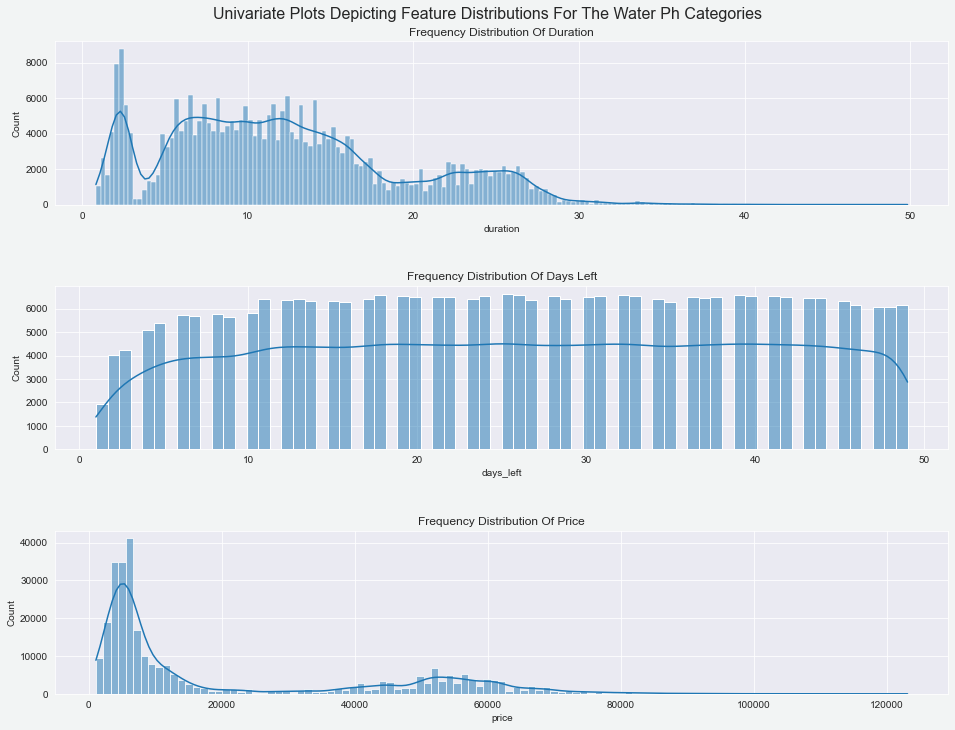

In [7]:
# fp.duration.value_counts().head(10)
fig, ax = plt.subplots(figsize=(16,12), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
count = 1
for i in fp.columns[8:]:
    plt.subplot(3, 1, count)
    h = sns.histplot(x=i, kde=True,data=fp)
    h.set_title(("frequency distribution of " + i).title().replace("_"," "), fontsize=12)
    count+=1
fig.suptitle(('Univariate plots depicting feature distributions for the water pH categories').title(), 
             x=0.5, y=0.92, fontsize=16);    

# Multivariate Analysis

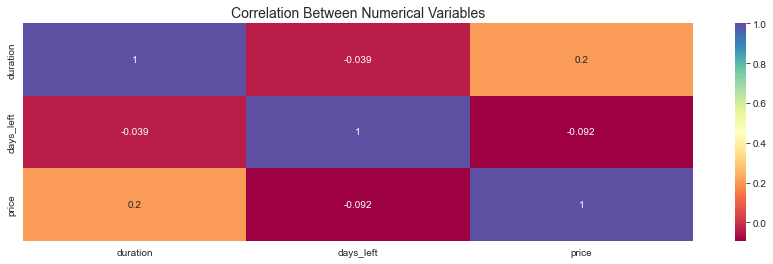

In [8]:
plt.figure(figsize = (15,4))
sns.heatmap(fp.corr(),annot=True,fmt='.2g', cmap="Spectral")
plt.title('Correlation Between Numerical Variables', fontsize=14);

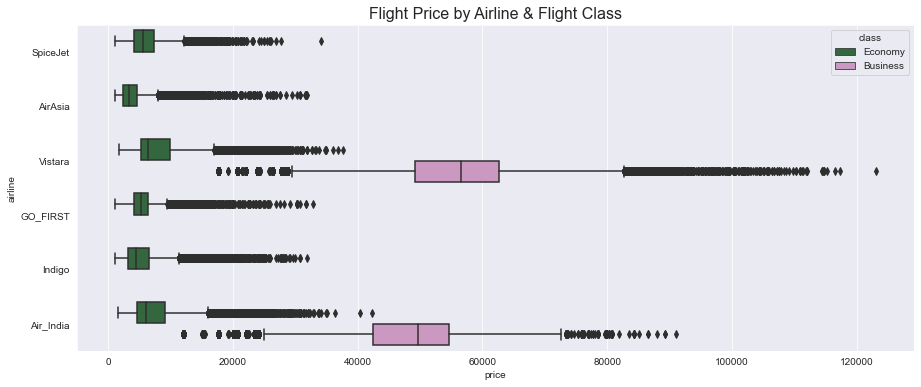

In [9]:
# How does the ticket price vary with Airlines and flight class?
plt.figure(figsize = (15,6))
sns.boxplot(y=fp['airline'], x=fp['price'], hue=fp['class'], palette="cubehelix")
plt.title('Flight Price by Airline & Flight Class', fontsize=16);

In [10]:
min = fp[['airline', 'class','price']].groupby(['airline','class']).agg({'price':'min'}).rename({'price':'min_price'},axis=1)
max = fp[['airline','class','price']].groupby(['airline', 'class']).agg({'price':'max'}).rename({'price':'max_price'},axis=1)
pd.concat([min,max], axis=1).sort_values('min_price')

,,min_price,max_price
airline,class,,
AirAsia,Economy,1105,31917
GO_FIRST,Economy,1105,32803
Indigo,Economy,1105,31952
SpiceJet,Economy,1106,34158
Air_India,Economy,1526,42349
Vistara,Economy,1714,37646
Air_India,Business,12000,90970
Vistara,Business,17604,123071


* It is found that only Vistara and Air India provide flight with business class, but the maximum price for the business flight of the Vistara is higher than that of the business flight of the Air India. 
* When we compared the maximum economy flight price from each airline, we found that economy flight ticket from the AirAsia, GO First, and Indigo offered the same lowest price, which is $1,105.00.

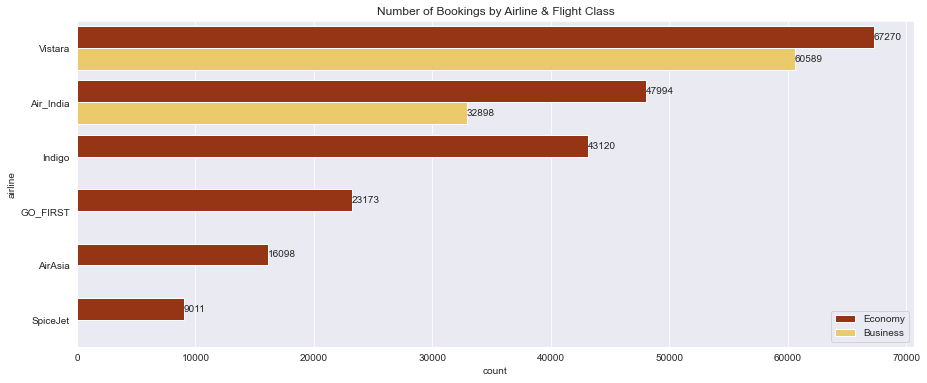

In [11]:
# How many bookings based on Airlines and flight class?
plt.figure(figsize = (15,6))
b = sns.countplot(y='airline', data=fp, order=abs_airline.index, hue='class', palette="afmhot")
b.set_title("Number of Bookings by Airline & Flight Class", fontsize=12)
b.bar_label(container=b.containers[0])
b.bar_label(container=b.containers[1])
plt.legend(loc='lower right');

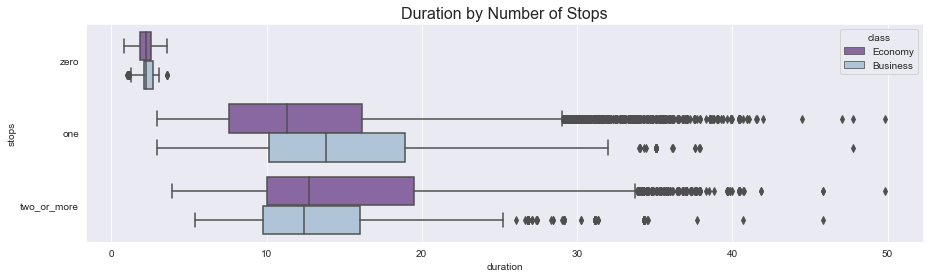

In [12]:
plt.figure(figsize = (15,4))
sns.boxplot(y="stops", x="duration", hue='class', data=fp, palette='BuPu_r')
plt.title('Duration by Number of Stops', fontsize=16);

In [13]:
# fp.sort_values('duration', ascending=False).head(10)
min_period = fp[['stops', 'class','duration']].groupby(['stops','class']).agg({'duration':'min'}).rename({'duration':'min_duration'},axis=1)
max_period = fp[['stops','class','duration']].groupby(['stops', 'class']).agg({'duration':'max'}).rename({'duration':'max_duration'},axis=1)
pd.concat([min_period,max_period], axis=1)

min_duration  max_duration
stops       class                               
one         Business          2.92         47.75
            Economy           2.92         49.83
two_or_more Business          5.42         45.83
            Economy           3.92         49.83
zero        Business          1.00          3.58
            Economy           0.83          3.58

In [14]:
print(f"The maximum duration for flight with no stops is only {fp[(fp.stops=='zero')].duration.max()} hours.")
flight_name = fp[(fp.stops=='zero') & (fp.duration==3.58)]['flight'].unique()[0]
airline = fp[(fp.stops=='zero') & (fp.duration==3.58)]['airline'].unique()[0]
departure_city = fp[(fp.stops=='zero') & (fp.duration==3.58)]['source_city'].unique()[0]
departure_time = fp[(fp.stops=='zero') & (fp.duration==3.58)]['departure_time'].unique()[0].lower()  
destination = fp[(fp.stops=='zero') & (fp.duration==3.58)]['destination_city'].unique()[0]
arrival_time = fp[(fp.stops=='zero') & (fp.duration==3.58)]['arrival_time'].unique()[0].lower()
print(f"The flight was {flight_name} from {airline} which fled from {departure_city} at {departure_time} and arrived {destination} at {arrival_time}.")

The maximum duration for flight with no stops is only 3.58 hours.
The flight was AI-773 from Air_India which fled from Kolkata at evening and arrived Mumbai at night.


<Figure size 1080x1440 with 0 Axes>

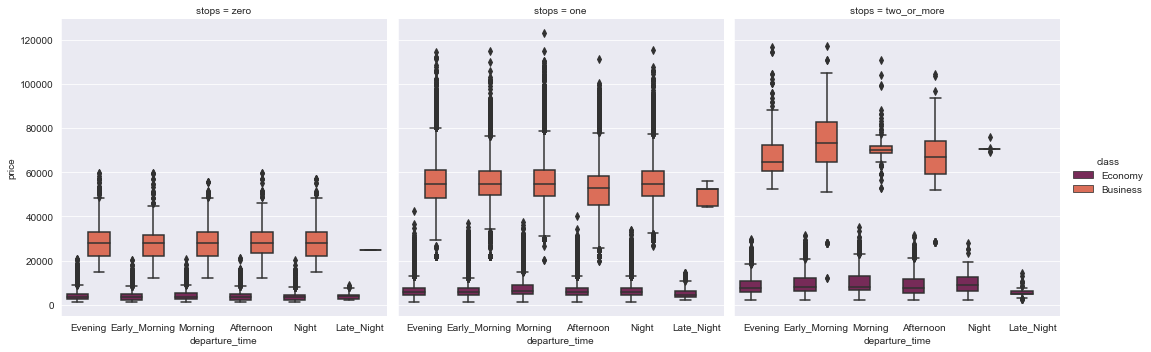

In [15]:
# How does the ticket price vary with number of stops, flight class, and departure time?
plt.figure(figsize = (15,20))
sns.catplot(x="departure_time", y="price", hue='class', col='stops', data=fp, kind="box", palette='rocket');

* From the 3rd graph, flight with business class, two or more stops and early morning departure time have the highest maximum price as compared to other flights. 
* There is no business class flight with two or more stops that depart at late night. 

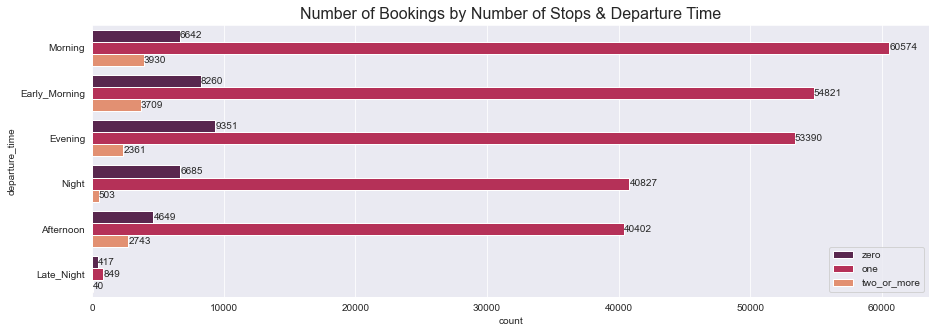

In [16]:
plt.figure(figsize = (15,5))
abs_departure_time = fp['departure_time'].value_counts(ascending=False)
c = sns.countplot(y='departure_time', data=fp, order=abs_departure_time.index, hue='stops', palette='rocket')
c.set_title("Number of Bookings by Number of Stops & Departure Time", fontsize=16)
c.bar_label(container=c.containers[0])
c.bar_label(container=c.containers[1])
c.bar_label(container=c.containers[2])
plt.legend(loc='lower right');

<Figure size 1080x1440 with 0 Axes>

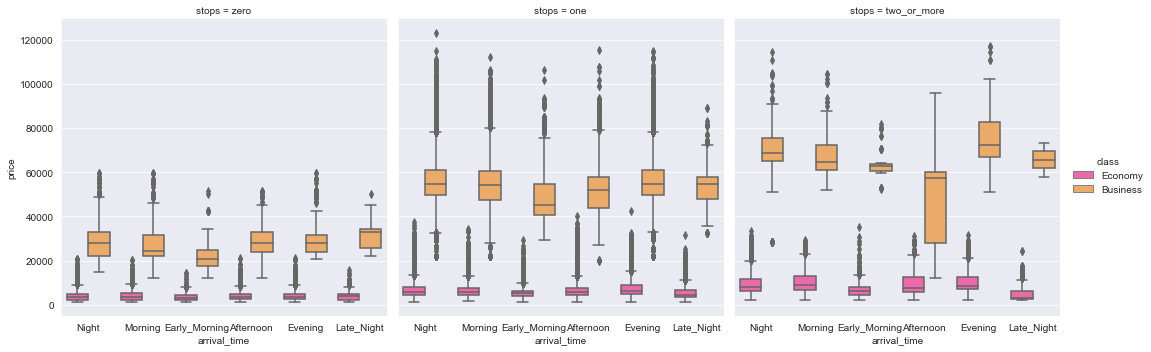

In [17]:
# # How does the ticket price vary with number of stops, flight class, and arrival time?
plt.figure(figsize = (15,20))
sns.catplot(x="arrival_time", y="price", hue='class', col='stops', data=fp, kind="box", palette='spring');

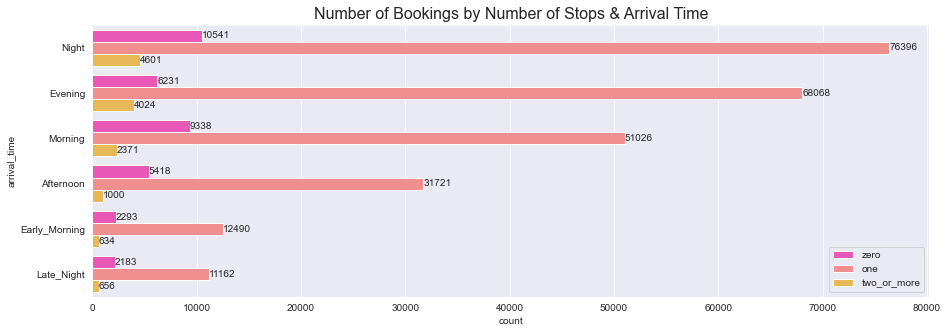

In [18]:
plt.figure(figsize = (15,5))
abs_departure_time = fp['arrival_time'].value_counts(ascending=False)
g = sns.countplot(y='arrival_time', data=fp, order=abs_arrival_time.index, hue='stops', palette='spring')
g.set_title("Number of Bookings by Number of Stops & Arrival Time", fontsize=16)
g.bar_label(container=g.containers[0])
g.bar_label(container=g.containers[1])
g.bar_label(container=g.containers[2])
plt.legend(loc='lower right');

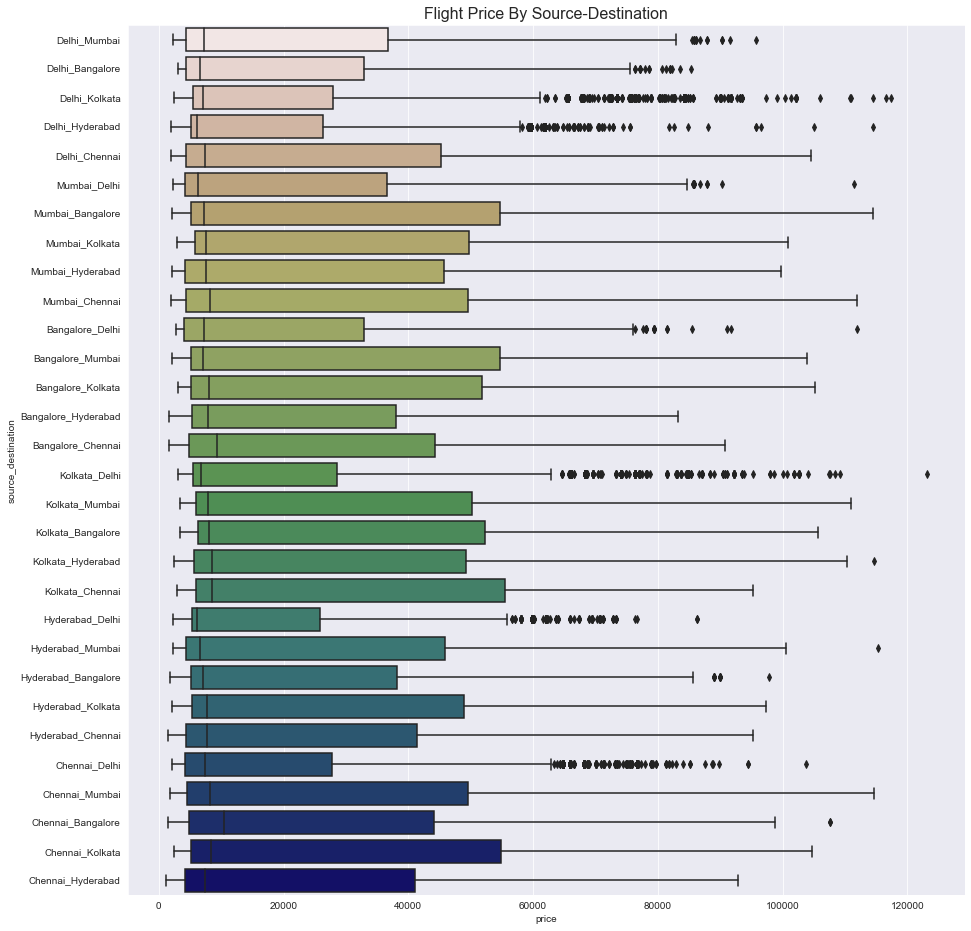

In [19]:
# How the price changes with change in Source and Destination?
fp['source_destination'] = fp['source_city'] + '_' + fp['destination_city']
plt.figure(figsize = (15,16))
sns.boxplot(y="source_destination", x="price", data=fp, palette='gist_earth_r')
plt.title('Flight Price By Source-Destination', fontsize=16)
plt.show()

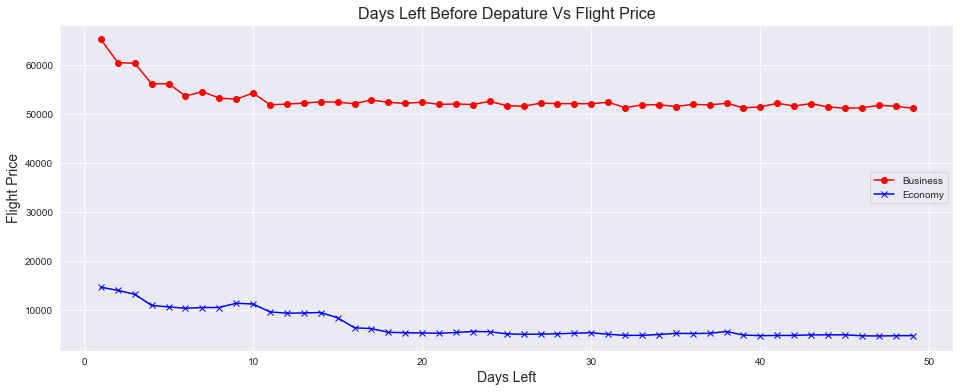

In [20]:
# How does the price vary with days left before departure?
dc = fp.groupby(['class','days_left']).agg({'price':'mean'}).reset_index()
plt.figure(figsize = (16,6))
plt.plot(dc[dc['class']=='Business']['days_left'], dc[dc['class']=='Business']['price'], color='red', marker='o', label='Business')
plt.plot(dc[dc['class']=='Economy']['days_left'], dc[dc['class']=='Economy']['price'], color='blue', marker='x', label='Economy')
plt.title('Days Left Before Depature Vs Flight Price', fontsize=16)
plt.xlabel('Days Left', fontsize=14)
plt.ylabel('Flight Price', fontsize=14)
plt.legend(loc='center right');

In [21]:
# How is the price affected when tickets are bought in just 1 or 2 days before departure?
fp[(fp['days_left']==1)|(fp['days_left']==2)].groupby(['airline', 'stops','class']).agg({'price':'mean'}).sort_values('price',ascending=False)

price
airline   stops       class                 
Vistara   two_or_more Business  82788.837838
          one         Business  71237.325737
Air_India two_or_more Business  69021.875000
          one         Business  56008.441828
Vistara   zero        Business  35977.843373
Air_India zero        Business  28332.855263
Vistara   two_or_more Economy   20484.470085
Air_India two_or_more Economy   17656.106796
Vistara   one         Economy   16542.035436
Indigo    two_or_more Economy   15982.523810
Air_India one         Economy   15077.854437
Indigo    one         Economy   14162.878531
GO_FIRST  one         Economy   13076.853933
SpiceJet  one         Economy   13005.575581
AirAsia   one         Economy   11011.066667
Indigo    zero        Economy    9025.528369
AirAsia   two_or_more Economy    8895.700000
Vistara   zero        Economy    8510.685484
Air_India zero        Economy    8314.693182
SpiceJet  zero        Economy    8220.862745
AirAsia   zero        Economy    7653.395833
GO_FIRST  zero        Economy    6728.930233

# Model Building & Evaluation

In [22]:
# Identify input and target columns
fp_d = fp.drop(['flight','source_destination'], axis=1)
input_cols, target_col = fp_d.columns[0:-1], fp_d.columns[-1]
X, Y = fp[input_cols].copy(), fp[target_col].copy()

In [23]:
# Identify numeric and categorical columns
num_cols = X.select_dtypes(np.number).columns.to_list()
cat_cols = X.select_dtypes(include='object').columns.to_list()
print("numerical:", num_cols)
print("categorical:", cat_cols)

numerical: ['duration', 'days_left']
categorical: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [24]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print("Training data: ", X_train.shape)
print("Testing data: ", X_test.shape)
print("Total Size: ", X_train.shape[0] + X_test.shape[0])

Training data:  (225114, 9)
Testing data:  (75039, 9)
Total Size:  300153


In [25]:
trans = ColumnTransformer(transformers=[("num", MinMaxScaler(), num_cols),
                                        ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)],
                           remainder='passthrough')

In [26]:
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [27]:
X_train[0]

array([0.52387755, 0.125     , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        ])

In [28]:
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
print(encoded_cols)

['airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon', 'departure_time_Early_Morning', 'departure_time_Evening', 'departure_time_Late_Night', 'departure_time_Morning', 'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero', 'arrival_time_Afternoon', 'arrival_time_Early_Morning', 'arrival_time_Evening', 'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night', 'destination_city_Bangalore', 'destination_city_Chennai', 'destination_city_Delhi', 'destination_city_Hyderabad', 'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business', 'class_Economy']


In [29]:
classifier=[]
lin_reg = LinearRegression()
classifier.append(lin_reg)
ridge_reg = Ridge(random_state=42)
classifier.append(ridge_reg)
lasso_reg = Lasso(random_state=42)
classifier.append(lasso_reg)
elastic_net = ElasticNet(random_state=42)
classifier.append(elastic_net)
classifier

[LinearRegression(),
 Ridge(random_state=42),
 Lasso(random_state=42),
 ElasticNet(random_state=42)]

In [30]:
rmse_train=[]
rmse_test=[]
for i in classifier:
    i.fit(X_train,Y_train)
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    rmse_training = mean_squared_error(Y_train, pred_train, squared=False)
    rmse_train.append(rmse_training)
    rmse_testing = mean_squared_error(Y_test, pred_test, squared=False)
    rmse_test.append(rmse_testing)
rmse_result = pd.DataFrame(data={'Model':['LR', 'Ridge', 'Lasso', 'Elastic Net'],
                                 'Training RMSE':rmse_train,
                                 'Testing RMSE':rmse_test})
rmse_result.sort_values('Testing RMSE',ascending=True)

,Model,Training RMSE,Testing RMSE
0,LR,6753.963965,6754.408386
1,Ridge,6753.969640,6754.412278
2,Lasso,6754.015614,6754.461951
3,Elastic Net,13177.186898,13168.471342


In [31]:
rmse_cvmean = []
rmse_cvstdev = []
for i in classifier:
    score = cross_val_score(i,X_train,Y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_mean = (np.sqrt(-score)).mean()
    rmse_stdev = (np.sqrt(-score)).std()
    rmse_cvmean.append(rmse_mean)
    rmse_cvstdev.append(rmse_stdev)
rmse_cv_result = pd.DataFrame(data={'Model':['LR', 'Ridge', 'Lasso', 'Elastic Net'],
                                    'CV_RMSE_MEAN':rmse_cvmean,
                                    'CV_RMSE_STDEV':rmse_cvstdev})
rmse_cv_result.sort_values('CV_RMSE_MEAN',ascending=True)

,Model,CV_RMSE_MEAN,CV_RMSE_STDEV
1,Ridge,6754.803225,43.658104
2,Lasso,6754.849939,43.647547
0,LR,6754.862441,43.649677
3,Elastic Net,13177.441293,71.861439


# Hyperparameter Tuning & Final Model Selection

In [32]:
def rmse_computation(model):
    model=model.fit(X_train, Y_train)
    predTrain=model.predict(X_train)
    predTest=model.predict(X_test)
    rmseTrain = mean_squared_error(Y_train, predTrain, squared=False)
    rmseTest = mean_squared_error(Y_test, predTest, squared=False)
    print("Training RMSE: ", rmseTrain, "\tTesting RMSE: ", rmseTest)

In [33]:
%%time
num_cols = X.select_dtypes(np.number).columns.to_list()
cat_cols = X.select_dtypes(include='object').columns.to_list()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
trans = ColumnTransformer(transformers=[("num", MinMaxScaler(), num_cols),
                                        ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)],
                           remainder='passthrough')
param_grid = {'ridge__alpha': [1.0, 5.0, 8.0]}
pipeline = Pipeline(steps=[('transformer',trans), ('ridge',Ridge(random_state=42))])

# train across 10 folds, that's a total of 3*10=30 rounds of training 
grid_search = GridSearchCV(pipeline, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, Y_train)
final_model = grid_search.best_estimator_
print(final_model)
rmse_computation(final_model)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('ridge', Ridge(alpha=5.0, random_state=42))])
Training RMSE:  6753.969807069516 	Testing RMSE:  6754.409056432405
CPU times: total: 56 s
Wall time: 54.1 s


In [34]:
for mean_score, params in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
    print(np.sqrt(-mean_score), params)

6754.944310883336 {'ridge__alpha': 1.0}
6754.944297744308 {'ridge__alpha': 5.0}
6754.944468870553 {'ridge__alpha': 8.0}


<b>We can compute a 95% confidence interval for the test RMSE:</b>

In [35]:
confidence = 0.95
pred_test = final_model.predict(X_test)
squared_errors = (pred_test - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([6687.83567888, 6820.33264112])

<b>Alternatively, we could use a z-scores rather than t-scores:</b>

In [36]:
m = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(6687.836758057466, 6820.331582907661)

# Making Predictions on New Inputs

In [37]:
def predict(model, single_input):
    input_df = pd.DataFrame([single_input])
    pred = model.predict(input_df)[0]
    return pred

In [38]:
new_input = {'airline': 'Air_India',
             'source_city': 'Chennai',
             'departure_time': 'Morning',
             'stops': 'one',
             'arrival_time': 'Late_Night',
             'destination_city': 'Mumbai',
             'class': 'Business',
             'duration':11.25,
             'days_left': 26}

In [39]:
round(predict(final_model, new_input),2)

51504.01

In [40]:
new_input_2 = {'airline': 'Vistara',
               'source_city': 'Chennai',
               'departure_time': 'Morning',
               'stops': 'one',
               'arrival_time': 'Late_Night',
               'destination_city': 'Mumbai',
               'class': 'Business',
               'duration':11.25,
               'days_left': 26}

In [41]:
round(predict(final_model, new_input_2),2)

55457.92

# Recommendation

* We could implement other ML algorithms, such as KNeighborsRegressor, decision tree regressor, random forest regressor or XGB regressor. 
* Ensemble methods such as stacking regressor and voting regressor could be used to check if the model performance could be further improved.  
* Randomized Search could be used to tune the hyperparameters to see if the hyperparameter combination is the same. 